# California_Housing_price

dataset: https://www.kaggle.com/harrywang/housing

## 1-Importing libraries

In [1]:
#For avoiding warning message
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, sys
from tqdm import tqdm
sns.set_context("poster", font_scale=1.3)
import pandas_profiling

In [3]:
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [77]:
# for modelling
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [5]:
df=pd.read_csv('housing.csv')

## 1.1- Getting to know data

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
df.shape

(20640, 10)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As we have seen by shape that there are 20640 data points in our dataset. All variables have given number. Only "total_bedroom" has 20433. So, there are missing values. We need to address this problem. But, first we will finish our data learning process.

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Notice only numerical attributes are there. So, "ocean_proximity" is not there. 25%, 50%, 75% shows the corresponding percentiles Points to Note: 25th percentile is called 1st quartile - 25% of the districts have a housing_median_age lower than 18. 50th percentile is called median - 50% of the districts have a housing_median_age lower than 29. 75th percentile is called 3rd quartile - 75% of the districts have a housing_median_age lower than 37.
Check about mean and standard deviation. Mean shows average value while Standard deviation is a number used to tell how measurements for a group are spread out from the average (mean), or expected value.
A low standard deviation means that most of the numbers are very close to the average. A high standard deviation means that the numbers are spread out.

In [12]:
# wE can also take transverse of this function
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [13]:
df['median_house_value'].head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [14]:
# We can check individual attributes as well. 
df.housing_median_age.head()

0    41.0
1    21.0
2    52.0
3    52.0
4    52.0
Name: housing_median_age, dtype: float64

In [15]:
#We only have one categorical variable
df['ocean_proximity'].value_counts().sort_values(ascending=False).head()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We can see we have 5 categories and how they are divided in dataset.

## 1.2-Distribution of Features

- A histogram is a simple representation of the distribution of values for a given feature <br>
- X-axis represents value bins and y-axis represents the frequency of an observation falling into that bin<br>
- It is also interesting to look at distributions broken up by outcome categories

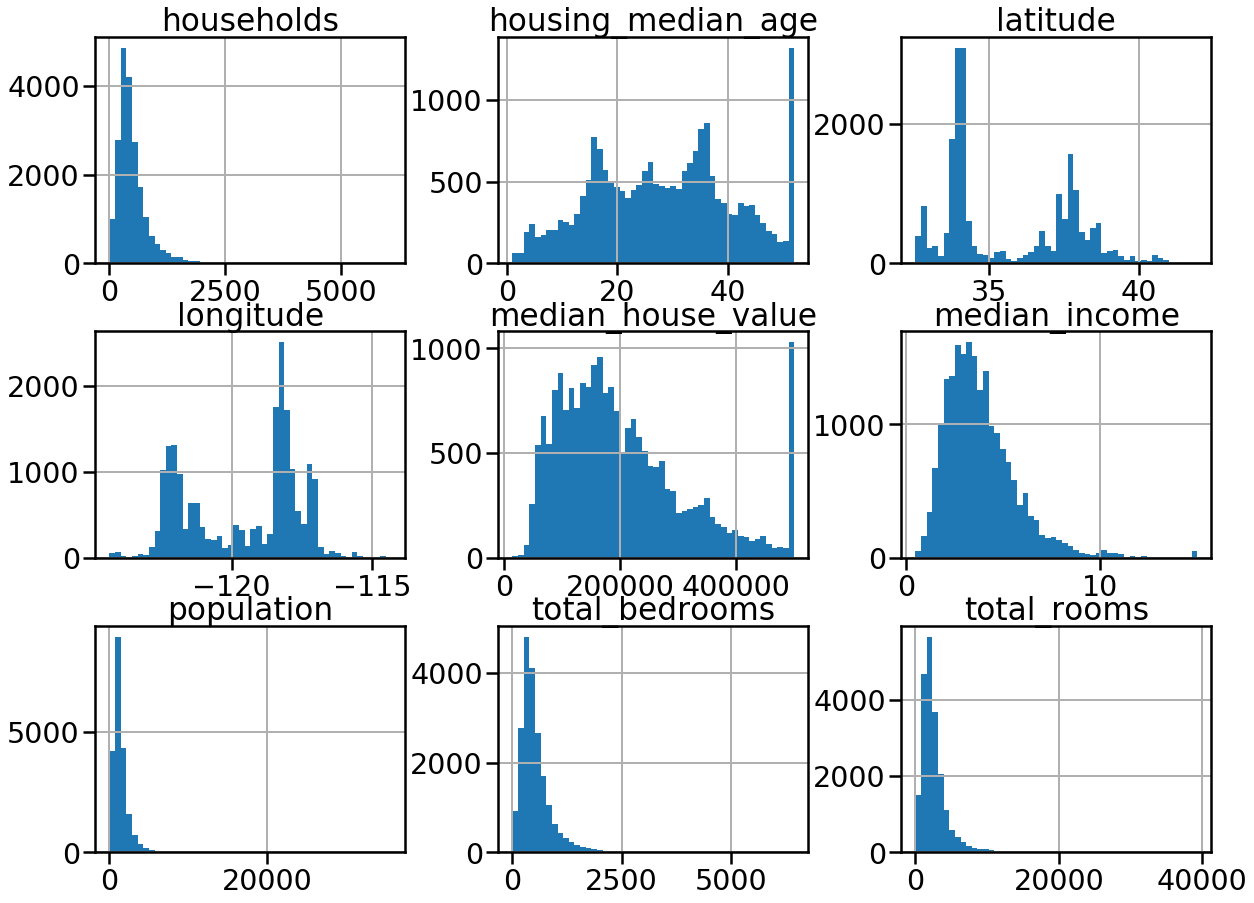

In [16]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres. Histogram is frequency of data within certain range.

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

From above histograms it's clear that most of the features are skewed. It seems that 'housing_median_age' and 'median_housing_value' have been capped a the end (Peak at the end).
We can also see that 'population','total_bedrooms','total_rooms' are right skewed meaning that there is big tail on right side. We need to transform this tail based data to bell shaped distribution i.e normal distribution.

## 2- Data wranggling

### 2.1 Dealing with categorical variables

In [17]:
df.shape

(20640, 10)

In [18]:
df=pd.get_dummies(df,columns=['ocean_proximity'], drop_first=True)

In [19]:
df.shape

(20640, 13)

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


### 2.2 Missing values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                     20640 non-null float64
latitude                      20640 non-null float64
housing_median_age            20640 non-null float64
total_rooms                   20640 non-null float64
total_bedrooms                20433 non-null float64
population                    20640 non-null float64
households                    20640 non-null float64
median_income                 20640 non-null float64
median_house_value            20640 non-null float64
ocean_proximity_INLAND        20640 non-null uint8
ocean_proximity_ISLAND        20640 non-null uint8
ocean_proximity_NEAR BAY      20640 non-null uint8
ocean_proximity_NEAR OCEAN    20640 non-null uint8
dtypes: float64(9), uint8(4)
memory usage: 1.5 MB


"total_bedrooms" has missing data.So, we need to deal with it.

In [22]:
df[df.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,0,0,1,0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,0,0,1,0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,0,0,1,0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,0,0,1,0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,0,0,1,0


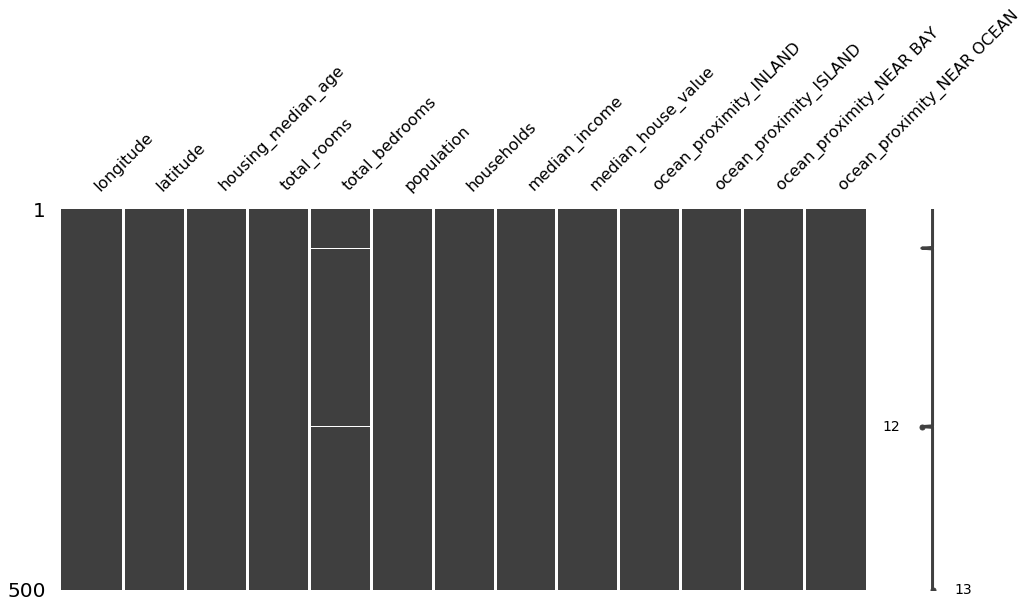

In [23]:
import missingno as msno

msno.matrix(df.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

In top 500 values, we see there are traces of white lines in variable total_bedrooms. Other variables are fully black and hence they show no sign of missing data. lets check for higher values.

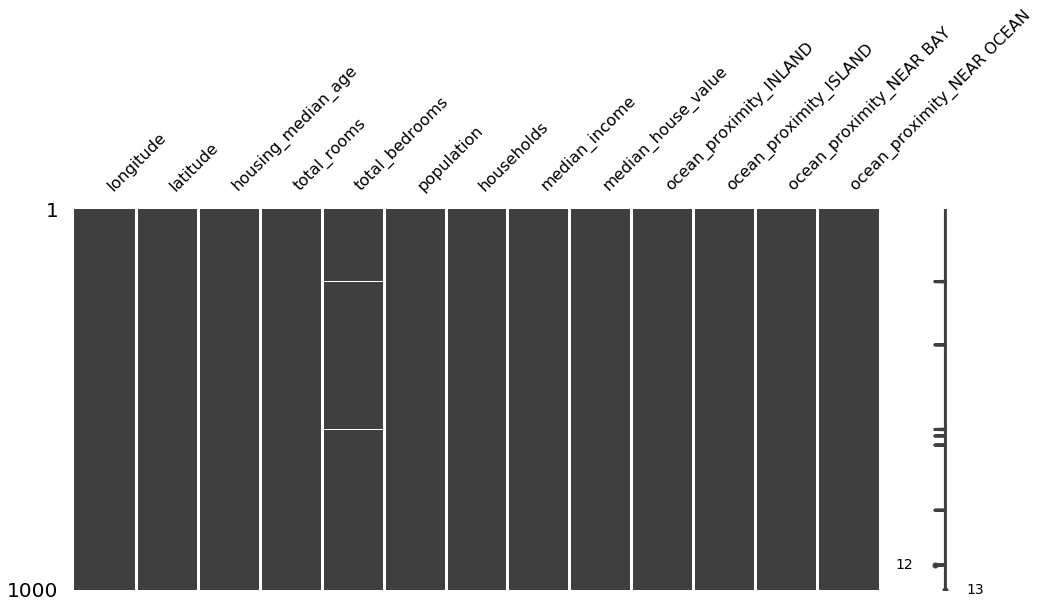

In [24]:
msno.matrix(df.sample(1000),
            figsize=(16, 7),
            width_ratios=(15, 1))

We see more of white strips. This shows how frequent these missing points are. They are not concentrated atleast for 1st 1000 values of total_bedrooms.

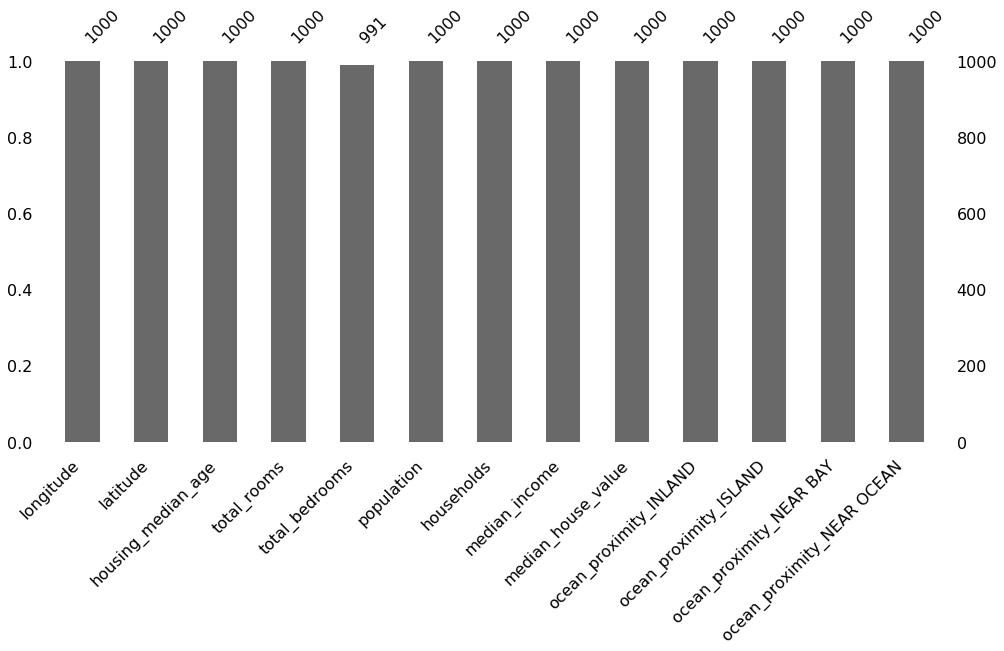

In [25]:
msno.bar(df.sample(1000),
            figsize=(16, 7),)

Out of 1000 values , we get 986 values of "total_bedrooms". It confirms more and more. Not only that, it visually make it easier to check all variables. In this data, we do not have huge problem of missing data as only one is under consideration since we run info()

In [26]:
print("All variables:", len(df))
print("total_bedrooms_with_nulls:", len(df[(df.total_bedrooms.isnull())]))

All variables: 20640
total_bedrooms_with_nulls: 207


### Treatng missing value problem

In [27]:
#Imputer to replace Null with mean
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0)

In [28]:
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df), columns=df.columns)

In [29]:
print("All variables:", len(df))
print("total_bedrooms_with_nulls:", len(df[(df.total_bedrooms.isnull())]))

All variables: 20640
total_bedrooms_with_nulls: 0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                     20640 non-null float64
latitude                      20640 non-null float64
housing_median_age            20640 non-null float64
total_rooms                   20640 non-null float64
total_bedrooms                20640 non-null float64
population                    20640 non-null float64
households                    20640 non-null float64
median_income                 20640 non-null float64
median_house_value            20640 non-null float64
ocean_proximity_INLAND        20640 non-null float64
ocean_proximity_ISLAND        20640 non-null float64
ocean_proximity_NEAR BAY      20640 non-null float64
ocean_proximity_NEAR OCEAN    20640 non-null float64
dtypes: float64(13)
memory usage: 2.0 MB


## 3- Problem of Outliers

In [31]:
df['median_house_value'].max()

500001.0

In [32]:
df['median_house_value'].min()

14999.0

Check how big is this difference in minimum and maximum. This creates gap in median income variable so high that we had possibility of outlier

In [33]:
df['median_house_value'].mean()

206855.81690891474

In [34]:
df['median_house_value'].std()

115395.6158744132

Again check this huge difference in std deviation and mean.

In [35]:
df[(df['median_house_value'] > 400000.0)].count()

longitude                     1744
latitude                      1744
housing_median_age            1744
total_rooms                   1744
total_bedrooms                1744
population                    1744
households                    1744
median_income                 1744
median_house_value            1744
ocean_proximity_INLAND        1744
ocean_proximity_ISLAND        1744
ocean_proximity_NEAR BAY      1744
ocean_proximity_NEAR OCEAN    1744
dtype: int64

In [36]:
df[(df['median_house_value'] > 500000.0)].count()

longitude                     965
latitude                      965
housing_median_age            965
total_rooms                   965
total_bedrooms                965
population                    965
households                    965
median_income                 965
median_house_value            965
ocean_proximity_INLAND        965
ocean_proximity_ISLAND        965
ocean_proximity_NEAR BAY      965
ocean_proximity_NEAR OCEAN    965
dtype: int64

We see 50 K and 40 K are so much above mean and still there are so many values at that higher range meaning house value is too high.

### 2.2.1-Histogram to check outliers

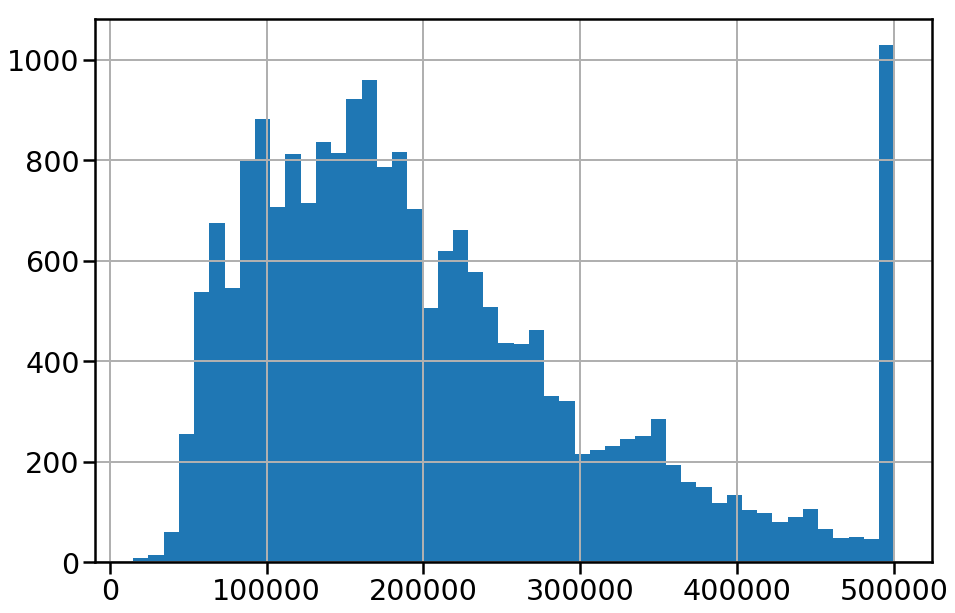

In [37]:
# Showing results with histogram
df.median_house_value.hist(bins=50,figsize=(15,10))


 mu = 206855.82 and sigma = 115392.82



Text(0.5, 1.0, 'median_house_value distribution')

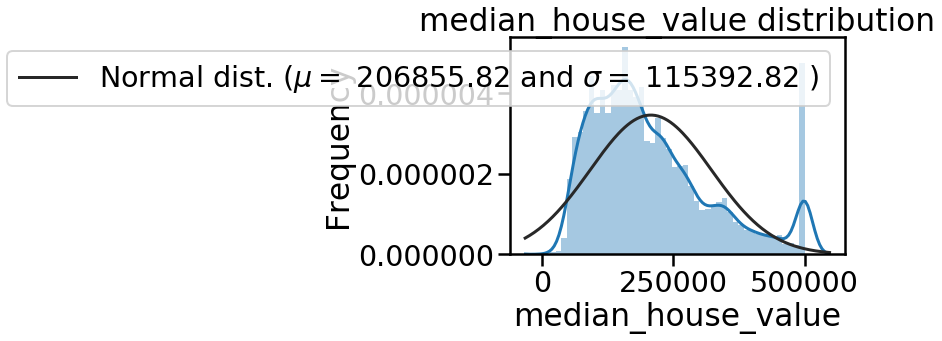

In [38]:
from scipy.stats import norm, skew
sns.distplot(df['median_house_value'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['median_house_value'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('median_house_value distribution')

### 2.3-Density plot to check outliers

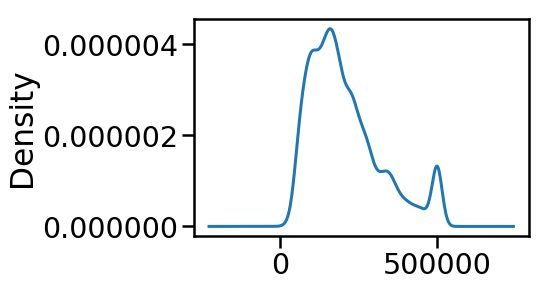

In [39]:
df.median_house_value.plot(kind='density')

### 2.4-Boxplot for outlier check

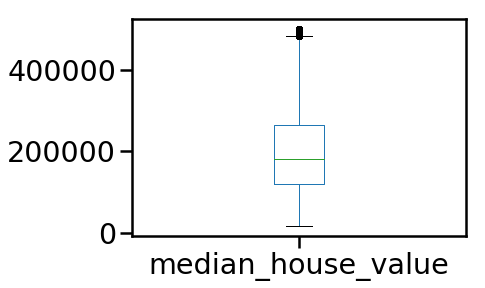

In [40]:
df.median_house_value.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

### 2.5- Scatter plot

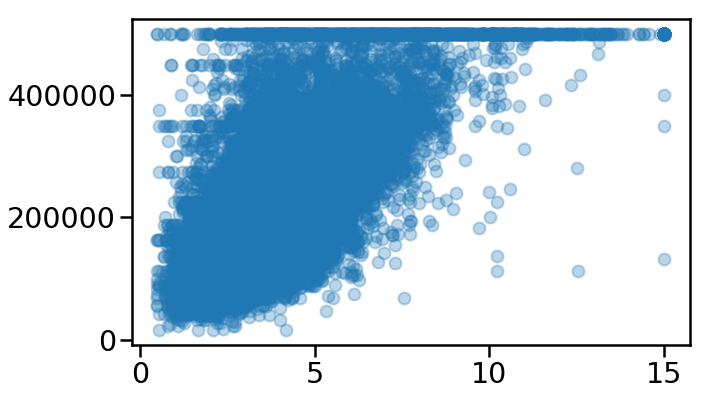

In [41]:
#Lets see more closely for only house value and median income

plt.figure(figsize=(10,6))
plt.scatter(y=df['median_house_value'],x=df['median_income'],alpha=0.3)

As noted above, a clear line can be seen at 500k at which the data is capped.another is 450, 350 and even slight hint down at 250k. 

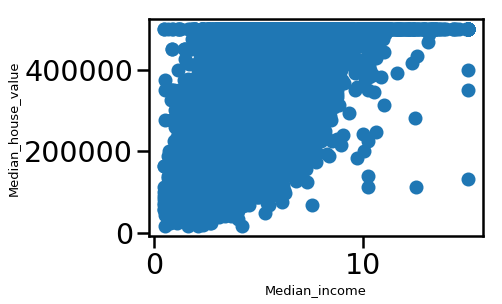

In [42]:
fig, ax = plt.subplots()
ax.scatter(x = df['median_income'], y = df['median_house_value'])
plt.ylabel('Median_house_value', fontsize=13)
plt.xlabel('Median_income', fontsize=13)
plt.show()

### 2.6-Probability plot or QQ plot

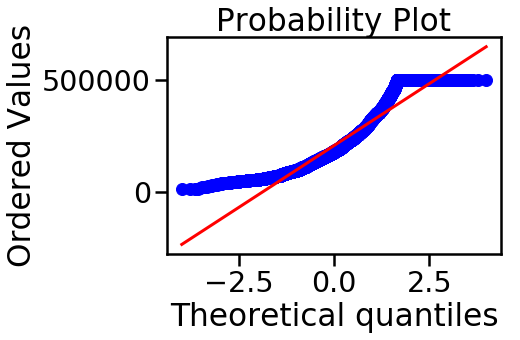

In [43]:
#Probability plot or QQ plot to see linear fit 
from scipy import stats
fig = plt.figure()
res = stats.probplot(df['median_house_value'], plot=plt)
plt.show()

Median_house_value is not linearly fitted as it is not normally distributed. We need to make log transformation on the target variable to make it more fit to the linear model.

### 2.7 Tukey IQR

In [44]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [45]:
tukey_indices, tukey_values = find_outliers_tukey(df['median_house_value'])
print(np.sort(tukey_values))

[482700. 482900. 483100. ... 500001. 500001. 500001.]


There we have our list of outlier values.

### 2.8-Treating Outlier problem
If we want to treat these outliers then feature scaling is the way. There are 4 methods of feature scaling that are implemented in scikit-learn:

 - StandardScaler
 - MinMaxScaler
 - RobustScaler
 - Normalizer

In [46]:
# Log Transformation of the Target Variable
df["median_house_value"]=np.log1p(df["median_house_value"]) # log(1+x)

### 2.9 Histogram of new value


 mu = 12.08 and sigma = 0.57



Text(0.5, 1.0, 'median_house_value distribution')

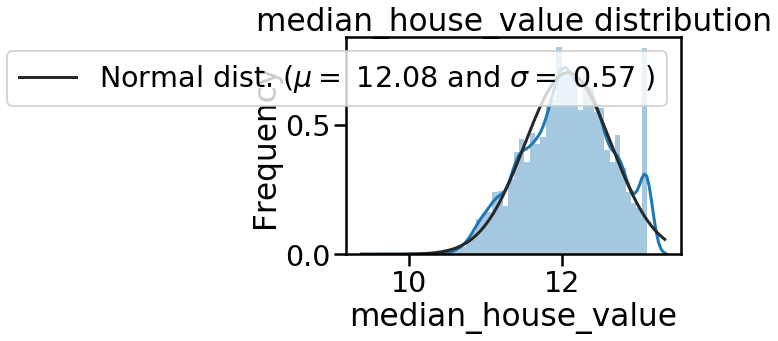

In [47]:
from scipy.stats import norm, skew
sns.distplot(df['median_house_value'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['median_house_value'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('median_house_value distribution')

### 2.10 Probability plot or QQ plot

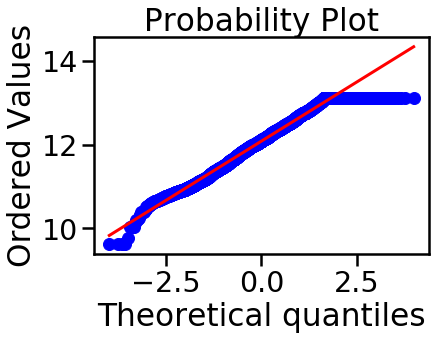

In [48]:
fig = plt.figure()
res = stats.probplot(df['median_house_value'], plot=plt)
plt.show()

## 4-Checking relationship between variables

### 4.1 -Sactter Plot

Text(0.5, 1.0, 'Distribution of households')

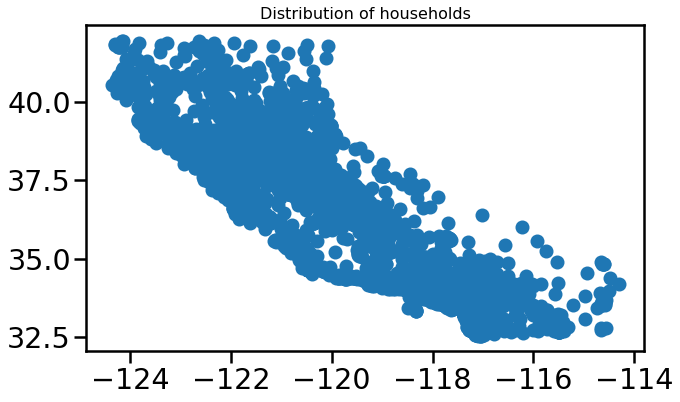

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['longitude'],y=df['latitude'])
plt.title("Distribution of households",size=16)

Text(0.5, 1.0, 'Distribution of households')

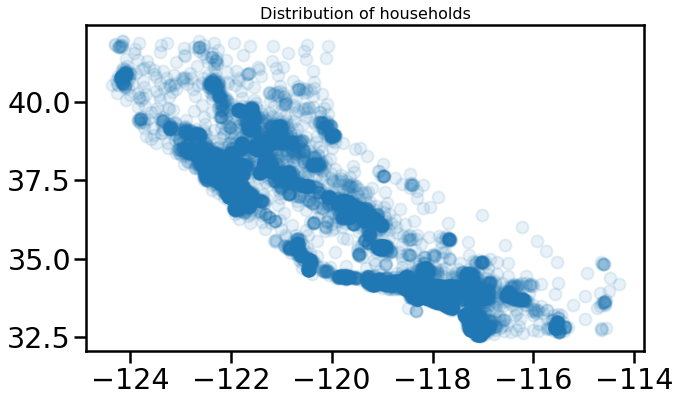

In [50]:
#If we want to see density of data points then we can set alpha=0.1
plt.figure(figsize=(10,6))
plt.scatter(x=df['longitude'],y=df['latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

### 4.2 Correlation matrix

In [51]:
corr_matrix=df.corr()
# Finding relation of our dependant variable with others. 
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.658431
ocean_proximity_NEAR BAY      0.161540
total_rooms                   0.154154
ocean_proximity_NEAR OCEAN    0.144810
households                    0.098728
total_bedrooms                0.078286
housing_median_age            0.076007
ocean_proximity_ISLAND        0.020379
population                    0.014745
longitude                    -0.023209
latitude                     -0.192596
ocean_proximity_INLAND       -0.567809
Name: median_house_value, dtype: float64

house value has 1 value with its own value. With other variable, we do not see very high correlation. Only 69 %, 13% or 10% are of any significance. In fact, population is negatively related with house value meaning higher the value, lower will be population.
It makes sense as people tend to move from richer neighbourhood if they cannot afford. Number of rooms and age of house are also reasonable with house value.

### 4.3 Pairplot

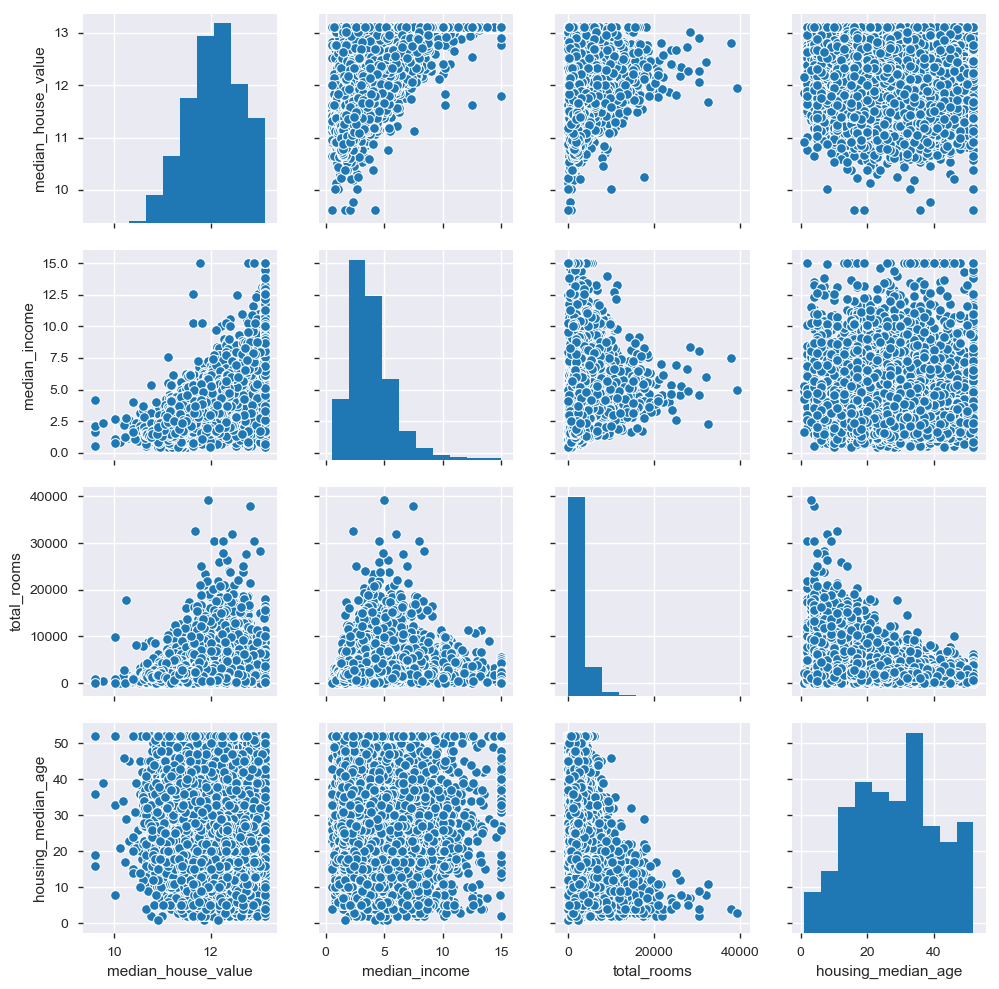

In [76]:
#using seaborn now for pairplot
sns.pairplot(df[['median_house_value','median_income','total_rooms','housing_median_age']])

Diagnal plot is of variable with its own value. Rest are with variables. We tend to find some pattern whether positive or negative. As we have seen income from above correlation, we expect income to have relation with house value.In the end of x-axis we observe an accumulation. Similary, we observe some caps in housing median age. Total_rooms does not make much sense from this. 
Hence, we cannot say that those values were actually higher enough to draw any relationship. Still, we ll keep these variable in mind.

## 5-Modeling

### Dividing into test and train data

In [53]:
x = df.drop('median_house_value', 1)
y = df.median_house_value

In [54]:
type(x)

pandas.core.frame.DataFrame

In [55]:
type(y)

pandas.core.series.Series

In [56]:
y.shape

(20640,)

In [57]:
x.shape

(20640, 12)

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 0)

In [ ]:
"""
We can do all scaling, normalization and even dummy variable conversion at once in few line of codes

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 


from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)



 """

### Cross Validation Strategy to pick the best model

In [60]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

### 5.1 Linear Regression

In [61]:
model_LinearReg = LinearRegression()
model_LinearReg.fit(x_train, y_train)
rmse_LinearReg = rmse_cv(model_LinearReg).mean()
rmse_LinearReg

0.33062570073102515

### 5.2 RidgeCV

In [62]:
model_RidgeCV = RidgeCV()
model_RidgeCV.fit(x_train, y_train)
rmse_RidgeCV = rmse_cv(model_RidgeCV).mean()
rmse_RidgeCV

0.33062749722081886

### 5.3 ElasticNet

In [63]:
model_ElasticNet=ElasticNet()
model_ElasticNet.fit(x_train,y_train)
rmse_ElasticNet=rmse_cv(model_ElasticNet).mean()
rmse_ElasticNet

0.5124803174397017

### 5.4 ElasticNetCV

In [64]:
model_ElasticNetCV=ElasticNetCV()
model_ElasticNetCV.fit(x_train,y_train)
rmse_ElasticNetCV=rmse_cv(model_ElasticNetCV).mean()
rmse_ElasticNetCV

0.4179757290040387

### 5.5 LassoCV

In [65]:
model_lassoCV=LassoCV()
model_lassoCV.fit(x_train,y_train)
rmse_lassoCV=rmse_cv(model_lassoCV).mean()
rmse_lassoCV

0.41325985431910306

### 5.6 LassoLarsCV

In [66]:
model_LassoLarsCV=LassoLarsCV()
model_LassoLarsCV.fit(x_train,y_train)
rmse_LassoLarsCV=rmse_cv(model_LassoLarsCV).mean()
rmse_LassoLarsCV

0.3307570564696894

### 5.7 KernelRidge

In [67]:
model_KernelRidge=KernelRidge()
model_KernelRidge.fit(x_train,y_train)
rmse_KernelRidge=rmse_cv(model_KernelRidge).mean()
rmse_KernelRidge

0.33080687485829186

### 5.8 RandomForestRegressor

In [68]:
model_RandomForest=RandomForestRegressor()
model_RandomForest.fit(x_train,y_train)
rmse_RandomForest=rmse_cv(model_RandomForest).mean()
rmse_RandomForest

0.24681939153457458

### 5.9 XGBoost

In [69]:
dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(x_train, y_train)

[00:11:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:11:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[00:11:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:11:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:11:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [70]:
rmse_xgb = model.values[-1,0]
rmse_xgb

0.23334699999999997

## 6- RMSE of each Model

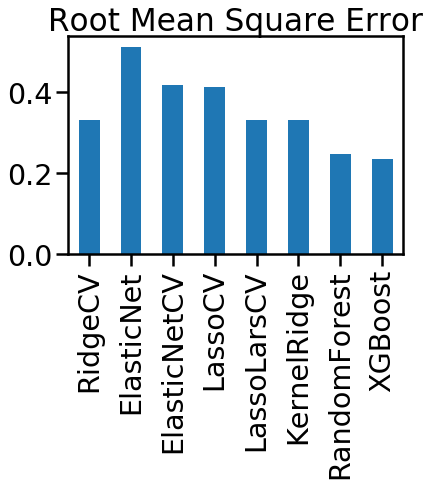

In [71]:
# Creating RMSE Dictionary
rmse_dict = {'data':[rmse_RidgeCV, rmse_ElasticNet, rmse_ElasticNetCV, rmse_lassoCV,rmse_LassoLarsCV,rmse_KernelRidge,rmse_RandomForest,rmse_xgb]}

# Creating RMSE DataFrame 
rmse_df = pd.DataFrame(data = rmse_dict, index = ['RidgeCV','ElasticNet','ElasticNetCV','LassoCV','LassoLarsCV','KernelRidge','RandomForest','XGBoost'])

# Plotting RMSE 
rmse_df.plot.bar(legend = False, title = 'Root Mean Square Error')

## 8 Dataset Inspection
After we are done with whole analysis, it is always good to inspect our dataset. We can create a function for that

In [72]:
import ipywidgets as widgets # Loads the Widget framework.
from IPython.core.magics.namespace import NamespaceMagics # Used to query namespace.

In [73]:
class VariableInspectorWindow(object):
    instance = None
    
    def __init__(self, ipython):
        """Public constructor."""
        if VariableInspectorWindow.instance is not None:
            raise Exception("""Only one instance of the Variable Inspector can exist at a 
                time.  Call close() on the active instance before creating a new instance.
                If you have lost the handle to the active instance, you can re-obtain it
                via `VariableInspectorWindow.instance`.""")
        
        VariableInspectorWindow.instance = self
        self.closed = False
        self.namespace = NamespaceMagics()
        self.namespace.shell = ipython.kernel.shell
        
        self._box = widgets.Box()
        self._box.layout.overflow_y = 'scroll'
        self._table = widgets.HTML(value = 'Not hooked')
        self._box.children = [self._table]
        
        self._ipython = ipython
        self._ipython.events.register('post_run_cell', self._fill)
        
    def close(self):
        """Close and remove hooks."""
        if not self.closed:
            self._ipython.events.unregister('post_run_cell', self._fill)
            self._box.close()
            self.closed = True
            VariableInspectorWindow.instance = None

    def _fill(self):
        """Fill self with variable information."""
        values = self.namespace.who_ls()
        self._table.value = '<div class="rendered_html jp-RenderedHTMLCommon"><table><thead><tr><th>Name</th><th>Type</th><th>Value</th></tr></thead><tr><td>' + \
            '</td></tr><tr><td>'.join(['{0}</td><td>{1}</td><td>{2}'.format(v, type(eval(v)).__name__, str(eval(v))) for v in values]) + \
            '</td></tr></table></div>'

    def _ipython_display_(self):
        """Called when display() or pyout is used to display the Variable 
        Inspector."""
        self._box._ipython_display_()

In [80]:
inspector = VariableInspectorWindow(get_ipython())
inspector

Exception: Only one instance of the Variable Inspector can exist at a 
                time.  Call close() on the active instance before creating a new instance.
                If you have lost the handle to the active instance, you can re-obtain it
                via `VariableInspectorWindow.instance`.

## 9 Pandas Profiling

In [75]:
pandas_profiling.ProfileReport(df)

Number of variables,13
Number of observations,20640
Total Missing (%),0.0%
Total size in memory,2.0 MiB
Average record size in memory,104.0 B
Numeric,7
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,2
